# Robniki

Da so kolesarske steze v Najlepšem mestutm™️ bolj estetske, je na vsakem prečkanju stranske ceste uvoz in izvoz na kolesarsko okrašen z okrasnim robnikom v višini nekaj centimetrov. Robnik hkrati povečuje varnost, saj upočasni kolesarje, razen tistih na polno vzmetenih gorskih kolesih. Poleg tega med dežjem robnik usmerja potok vode, po dežju pa še nekaj časa zadržuje mlake, katerih namen je pranje koles in hlač, s čimer MOL poskrbi, da bo imelo najlepše mesto tudi najlepše in s tem najsrečnejše kolesarke in kolesarje.

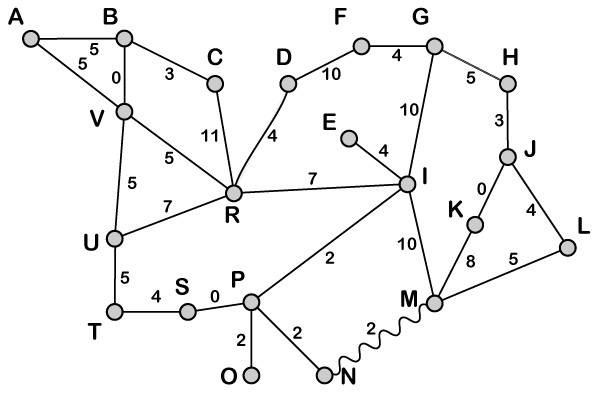

Zemljevid na sliki prikazuje povezave med križišči (zaradi varstva osebnih podatkov so njihova imena zamenjana s črkami), na povezavah pa je označeno število robnikov, čez katere je potrebno skočiti ob vožnji iz enega križišča do drugega.

Zemljevid je podan v obliki slovarja, katerega ključi so terke z imeni povezanih križišč, pripadajoče vrednosti pa število robnikov med njima. Začne se tako:

```python
zemljevid = {("A", "B"): 5, ("A", "V"): 5,
             ("B", "A"): 5, ("B", "C"): 3, ("B", "V"): 0,
             ("C", "B"): 3, ("C", "R"): 11,
             ...
             }
```

Če imamo `odkod = "A"` in `kam = ="V"`, potem `zemljevid[(odkod, kam)]` pove število robnikov med `odkod` in `kam` (v tem primeru 5).

Če določen par ne nastopa kot ključ, potem med tema križiščema ni neposredne povezave.

**Vse spodnje funkcije naj načelno delujejo s poljubnim zemljevidom, čeprav testi uporabljajo samo zemljevid na sliki!**

## Ogrevalna naloga

Napiši funkcijo `izpisi_pot(pot)`, ki prejme pot v obliki zaporedja križišč, na primer `"FGIR"`. Funkcija naj izpiše pare vseh zaporednih vozlišč, torej, na primer

```python
('F', 'G')
('G', 'I')
('I', 'R')
```

### Rešitev

Bistvo te vaje je bilo samo, da se spomnimo, kako dobiti zaporedne pare vozlišč. Pythonovska rešitev je takšna.

In [1]:
def izpisi_pot(pot):
    for odkod, kam in zip(pot, pot[1:]):
        print(odkod, kam)

In [2]:
izpisi_pot("FGIRM")

F G
G I
I R
R M


In [3]:
def izpisi_pot(pot):
    for i in range(len(pot) - 1):
        print(pot[i], pot[i + 1])

Ne pravim, da ne dela. Dela.

In [5]:
izpisi_pot("FGIRM")

F G
G I
I R
R M


Vendar: v prvi funkciji naredimo zanko čez seznam (parov). V drugi delamo zanko prek indeksov. V Pythonu se poskusimo zanki vedno izogniti, če se ji ne moremo, pa napišemo zanko (po možnosti `for`) čez tisto, čez kar v resnici želimo iti. To pa so pari, ne indeksi.

Še malo grše je tako.

In [6]:
def izpisi_pot(pot):
    i = 0
    while i < len(pot) - 1:
        print(pot[i], pot[i + 1])
        i += 1

In [7]:
izpisi_pot("FGIRM")

F G
G I
I R
R M


Kdor programira tako, bo pisal dolge programe, ki bodo grdi in počasni. Pa še zmotil se bo veliko večkrat.

## Obvezna naloga

Napiši naslednje funkcije:

- `robnikov(zemljevid, pot)` prejme zemljevid v gornji obliki in pot v obliki niza, na primer `FGIR`. Vrniti mora število robnikov, ki jih bo kolesar prevozil na takšni poti.

    Klic `robnikov(zemljevid, "FGIR")` vrne `21` (od F do G naleti na 4 robnike, od G do I na 10 in od I do R na 7).

- `prevozno(zemljevid, pot)` vrne `True`, če je podano pot možno prevoziti, torej, če obstajajo povezave med vsemi zaporednimi pari križišč. Če pot ni možna, vrne križišče, v katerem obtiči kolesar.

    Klic `prevozno(zemljevid, "FGIR")` vrne `True`, klic `prevozno(zemljevid, "FGIKH")` pa vrne `"I"`, saj pot iz I v K ni možna. (Prav tako ni možna pot iz K v H, vendar se kolesar že prej ustavi v I).

- `guma(zemljevid, pot, trpeznost)` prejme zemljevid in pot, poleg tega pa trpežnost gume. Trpežnost gume se na vsakem robniku zmanjša za 1. Ko pade na 0, je guma pokončana, zračnica predrta in prazna, tako da se mora kolesar ustaviti. Funkcija mora vrniti križišče, na katerem se bo ustavil kolesar - bodisi zato, ker bo konec gume, bodisi zato, ker določena povezava sploh ne obstaja (tako kot pri prejšnji funkciji). Če vse povezave obstajajo in guma zdrži, kolesar pride do konca in funkcija vrne zadnje križišče.

    - Klic `guma(zemljevid, "FGIMNPOPI", 1000)` vrne `"I"`, saj vse povezave obstajajo in guma je fantastična.
    - Klic `guma(zemljevid, "FGIMNPOPI", 25)` vrne `"M"`: guma spusti na enem od robnikov med M in N.
    - Klic `guma(zemljevid, "FGIMRDE", 1000)` vrne `"M"`, saj ni povezave med M in R.

### Rešitev

#### `robnikov`

Gremo po parih zaporednih križišč. Za vsak par pobleda v slovar, koliko robnikov vsebuje in to sešteva.

In [8]:
def robnikov(zemljevid, pot):
    n = 0
    for a, b in zip(pot, pot[1:]):
        n += zemljevid[(a, b)]
    return n

Čez nekaj tednov bomo znali še krajše. Upam. :)

In [9]:
def robnikov(zemljevid, pot):
    return sum(zemljevid[(a, b)] for a, b in zip(pot, pot[1:]))

Za zdaj je tudi prva rešitev čisto dobra. Zelo slaba pa je tale rešitev.

In [10]:
def robnikov(zemljevid, pot):
    n = 0
    for a, b in zip(pot, pot[1:]):
        for odsek, robov in zemljevid.items():
            if odsek == (a, b):
                n += robov
    return n

Takšna rešitev (po)kaže, da ne razumemo slovarjev - tega, čemu so namenjeni in kaj zmorejo. Slovarji obstajajo prav zato, da nam ne bi bilo potrebno pisati notranje zanke. Če pišemo takšno zanko, potem slovar obravnavamo kot **seznam** parov (ključ, vrednost) in **sami** (počasi) brskamo po njem. Slovar zna vrednost, ki pripada ključu, poiskati sam in pri tem je - to je najpomembnejše - zelo hiter.

Mimogrede: pisali smo `odsek == (a, b)`. To je veliko krajše in preglednejše kot `odsek[0] == a and odsek[1] == b`, ni?

#### **`prevozno`**

`prevozno` gre po parih. Za vsakega preveri, ali je nastopa kot ključ v slovarju. Če ne, vrne začetno križišče te povezave. Če se zanka izteče do konca, pa vrne `True`.

In [11]:
def prevozno(zemljevid, pot):
    for a, b in zip(pot, pot[1:]):
        if (a, b) not in zemljevid:
            return a
    return True

Spet: pomembno je, da pišemo `if (a, b) not in zemljevid:`. Slovar zna sam ugotoviti - in pri tem je zelo hiter - ali določen ključ obstaja ali ne. Druge variante, na primer

In [12]:
def prevozno(zemljevid, pot):
    for a, b in zip(pot, pot[1:]):
        imamo = False
        for odsek in zemljevid:
            if odsek == (a, b):
                imamo = True
        if not imamo:
            return a
    return True

so zapletene, nepregledne in počasne. Ker ne izkoriščajo tega, kar ponujajo slovarji.

Tale pa se lahko pohvali, da uporablja specifičen Pythonov trik, `else` po `for`, vendar tudi to ne prispeva ravno k preglednosti in hitrosti.

In [13]:
def prevozno(zemljevid, pot):
    for a, b in zip(pot, pot[1:]):
        for odsek in zemljevid:
            if odsek == (a, b):
                break
        else:
            return a
    return True

#### **`guma`**

Tule pa skoraj ni kaj dodati, saj smo že vse povedali.

In [14]:
def guma(zemljevid, pot, trpeznost):
    for a, b in zip(pot, pot[1:]):
        if (a, b) not in zemljevid:
            return a
        trpeznost -= zemljevid[(a, b)]
        if trpeznost <= 0:
            return a
    return b

## Dodana naloga

Najlepše križišče je križišče, ki je obkroženo z največ robniki. Za gornji zemljevid je to nedvomno vozlišče R, saj na povezavah okrog njega naštejemo kar 34 (11 + 4 + 7 + 7 + 5) robnikov.

Napiši funkciji

- `najlepse(zemljevid)`, ki vrne najlepše križišče. Za gornji zemljevid torej `"R"`. Če si naziv najlepšega križišča deli več križišč, lahko funkcija vrne kateregakoli izmed njih.
- `najlepsa(zemljevid, n)`, ki vrne urejen seznam `n` najlepših križišč. Klic `najlepsa(zemljevid, 3)` vrne `["R", "I", "M"]`.

### Rešitev

Tokrat je pa malo bolj zapletena, če ne uporabimo trika, ki se ga še nismo učili.

Funkciji `max` in `sorted` (pa še katera druga) sprejemajo argument `key`, ki mora biti funkcija. Če ga podamo, recimo, funkciji `sorted`, potem ne bo primerjal elementov, ki jih ureja, po njihovih vrednostih, temveč bo za vsak element poklical podano funkcijo in jih uredil po vrednostih, ki jih vrača ta funkcija.

Ta funkcija je lahko tudi, na primer, `lepota.get`, pri čemer je `lepota` nek slovar. Torej, če pokličemo `sorted(lepota, key=lepota.get)`, bo `sorted` vrnil seznam ključev slovarja (zakaj ključev? če gremo z zanko `for` čez slovar, dobimo njegove ključe in tudi `sorted` ureja tisto, kar za slovar vrne zanka `for`) urejen po njihovih vrednostih, ki jim pripadajo. Zakaj urejen po pripadajočih vrednostih? Zato, ker bo za vsak ključ poklical `lepota.get` (s ključem kot argumentom) in ključe urejal po rezultatih, ki jih bo vračala ta funkcija. Ta funkcija pa vrača vrednosti, ki pripadajo ključem.

Rešitev je torej